In [1]:
#Librerías a usar para explroacion , analisis y limpieza
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
#Cargar los dato 
df_original = pd.read_csv('../data/housing.csv')
#Crear una copia del DataFrame para poder limpiarlo y procesarlo
df_cop = df_original.copy()
#Revisar primeros 5 ejemplso de los datos 
df_cop.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **Variables**:

**longitude:**  Nos indica que tan al oeste está , entre mas alto el valor mas cerca al oeste está .

**latitude:** Nos indica que tan al norte está , entre mas alto el valor mas cerca al norte está.

**longitude:** Edad media de la casa , entre mas pequeño el valor mas nueva es la casa.

**total_rooms:** Total de habitaciones(salas, comedores etc) dentro el bloque (La zona de las casas).

**total_bedrooms:** Total de dormitorios dentro del bloque (La zona de las casas).

**population:** Total de personas que viven en la zona.

**households:** Total de hogares dentro de la zona. Grupo de personas que residen. 

**median_income:** Promedio de ingresos de los hogares dentro de un bloque de casas (zona). Medido en miles de dolares .

**median_house_value:**  Valor medio de las casas por hogares dentro del bloque(zona). 

**ocean_proximity:**  Si la casa se encuentra cerca del oceano.

In [3]:
#Revisar cantidad de ejemplos 
df_cop.shape

(20640, 10)

In [4]:
#Información general para verificar los tipos de datos sean correctos
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Descripcion general de los datos ya que casi todos son numericos 
df_cop.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


Podemos mirar  que en total_bedrooms nos falta informacion lo que puede ser por falta de valores asi que probablemente tengamos nulos.

También podemos sacar informacion como que el promedio mediano de los ingresos por bloque son de 20.000$.

También en promedio mediano de ingresos de las casas por hogares dentro del bloque está en 206.000$ Teniendo en cuenta una desviación de 115K de diferencia lo que da evidencia a altos valores de variación

In [6]:
#Revisar duplicados 
print(df_cop.duplicated().sum())
df_cop[df_cop.duplicated()]

0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [7]:
#Revisar valores nulos 
print(df_cop.isna().sum())
print('-'*200)
print(f'Porcentaje de valores nulos:\n\n{(df_cop.isna().mean()* 100).round(2)}')

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Porcentaje de valores nulos:

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        1.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64


In [8]:
#Revismos la columna con los valores nulos para ver que los causa
df_cop[df_cop['total_bedrooms'].isna()].head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
738,-122.14,37.67,37.0,3342.0,NaN,1635.0,557.0,4.7933,186900.0,NEAR BAY
1097,-121.77,39.66,20.0,3759.0,NaN,1705.0,600.0,4.7120,158600.0,INLAND
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,143100.0,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,204100.0,INLAND
1493,-122.01,37.94,23.0,3741.0,NaN,1339.0,499.0,6.7061,322300.0,NEAR BAY


Vemos que son nulos directos. Esto se puede deber a que al momento de sacar estos datos hubieron zonas las cuales no pudieron encontrar cierta información como lo es el promedio de dormitorios x bloque(zona) 

Siguiente paso limpiar esos valores nulos imputando la mediana a los valores nulos 

In [9]:
#Tratar la columna con valores nulos 
df_cop['total_bedrooms'] = df_cop['total_bedrooms'].fillna(df_cop['total_bedrooms'].median())
#Rectificar que se hayan tratado los nulos 
print(df_cop[df_cop['total_bedrooms'].isna()])
#Suma de nulos totales
print(df_cop.isna().sum())

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


Debido a la gran correlacion entre bedrooms y rooms podríamos realiza run ratio para comparar estas dos magnitudes y tener algo como dormitorios por habitaciones para entender mas o menos cuantas habitaciones y cuantos dormitorios por bloque 

In [10]:
#Crear variable 
df_cop['bedrooms_x_room'] = df_cop['total_bedrooms'] / df_cop['total_rooms']

#Eliminar las variables que ya están en el ratio 
variables_drop = ['total_bedrooms', 'total_rooms'] #Variables a eliminar debido a que las tenemos ahora en un ratio para darle mas informacion y evitar una multicolonealidad
df_cop.drop(variables_drop, axis=1, inplace=True)

#Revisar los datos con los nuevos cambios 
df_cop.head(5)

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,bedrooms_x_room
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096


In [11]:
#Crear un dataframe tempora para poder realizar las visualizacion incluyendo variaables categoricas
df_temp = df_cop.copy()
#Realizar one hot para (ocean_proximity)
df_temp = pd.get_dummies(df_temp, columns=['ocean_proximity'], dtype=int, drop_first=True)

In [12]:
#Revisar el dataframe temporal
df_temp.head(3)

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,bedrooms_x_room,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0.146591,0,0,1,0
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0.155797,0,0,1,0
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0.129516,0,0,1,0


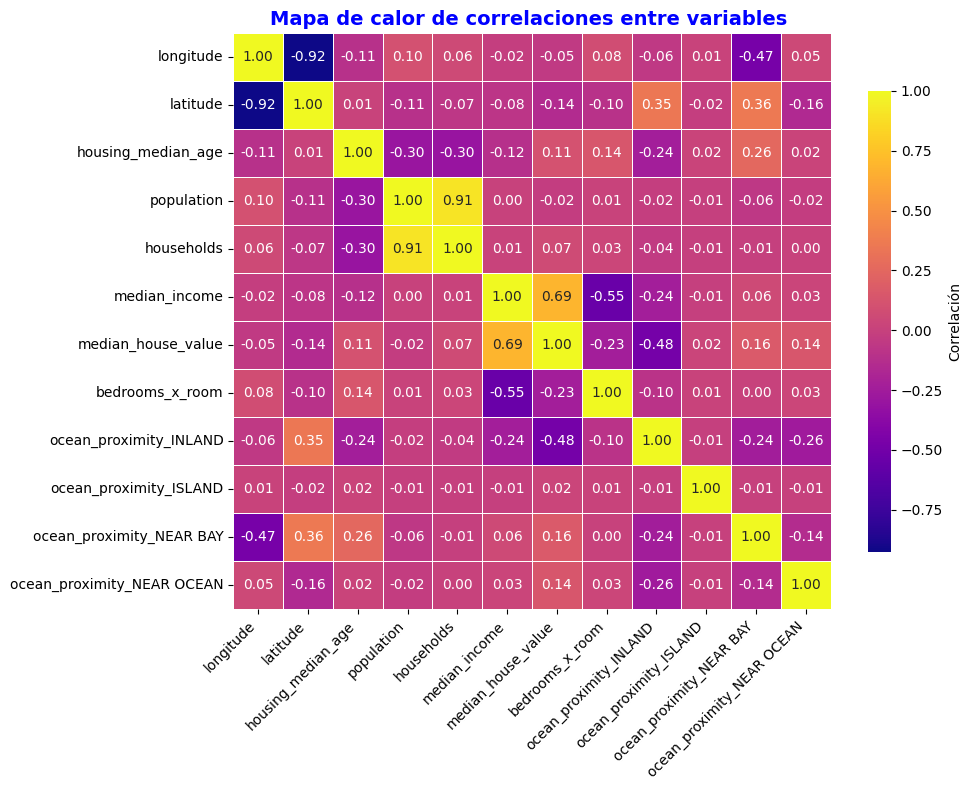

In [39]:
#Realizar un heatmap para mirar correlaciones entre variables tanto la target(median_house_value) como las demas
plt.figure(figsize=(10, 8))
sns.heatmap(
    df_temp.corr(numeric_only=True),
    annot=True,
    cmap='plasma',
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': .8, 'label': 'Correlación'}
)

plt.title('Mapa de calor de correlaciones entre variables ', color='blue', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

en el mapa de correlacion podemos er que no hay realmente muchas variables correlacionadas con el objetivo sin embargo podemos rescatar los ingresos medianos por bloque(zona), la edad también puede influir aunque no esté correlacionada a su vez podríamos utilizar ocean_proximity_inland

In [13]:
#Revisar otuliers 

 

#Funciónde detección de outliers
def outlier_detect(df):
    resultados = []
    v_numericas = df.select_dtypes(include=[np.number]).columns
    

    for v in v_numericas:
        Q1 = df[v].quantile(0.25)
        Q3 = df[v].quantile(0.75)
        IQR = Q3 - Q1
        

        limite_inferior = Q1 - (1.5 * IQR)
        limite_superior = Q3 + (1.5 * IQR)
        

        outliers = df[(df[v] < limite_inferior) | (df[v] > limite_superior)]
        

        resultados.append({
            'Columna': v,
            'Cantidad de outliers': len(outliers),
            'Porcentaje de outlier': round((len(outliers) / len(df)) * 100, 2)
        })
    

    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values(by='Cantidad de outliers', ascending=False).reset_index(drop=True)
    

    return df_resultados

In [14]:
resumen = outlier_detect(df_cop)
resumen

,Columna,Cantidad de outliers,Porcentaje de outlier
0,households,1220,5.91
1,population,1196,5.79
2,median_house_value,1071,5.19
3,median_income,681,3.30
4,bedrooms_x_room,635,3.08
5,housing_median_age,0,0.00
6,longitude,0,0.00
7,latitude,0,0.00


Tenemos outliers presentes sin embargo el dataframe no representa individuos sino bloques o zonas lo que quiere decir que es informacion cierta por lo que puedn servir estos valores

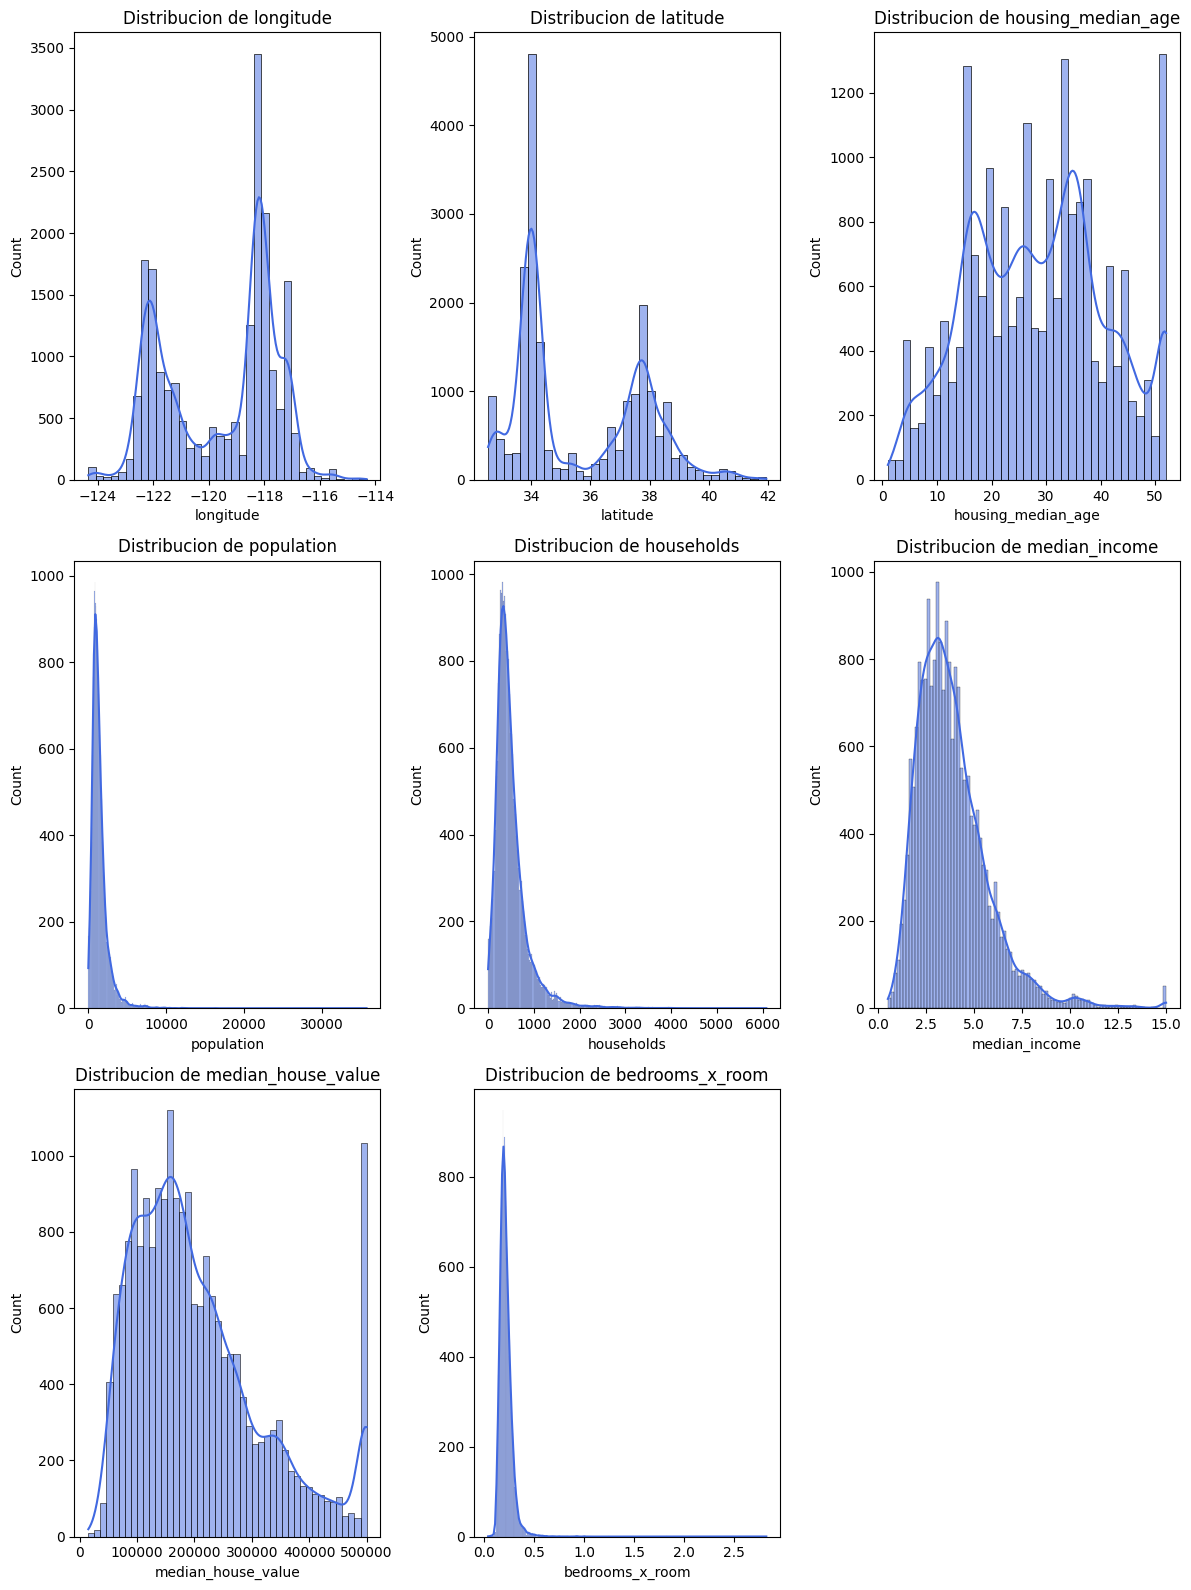

In [22]:
#Variables numericas solamente
variables_numericas = df_cop.select_dtypes(include=[np.number]).columns
#Revisar distribuciones de cada una de las variables 
fig, axs = plt.subplots(3, 3, figsize=(12, 4 * 4))
axs = axs.flatten()

for i, c in enumerate(variables_numericas):
    sns.histplot(df_cop[c], ax=axs[i], kde=True, color='royalblue')
    axs[i].set_title(f'Distribucion de {c}') 

fig.delaxes(axs.flat[8])
plt.tight_layout()
plt.show()

## Conclusiones del análisis exploratorio
- Las variables geográficas (`longitude`, `latitude`) muestran una concentración en zonas específicas de California, confirmando la ubicación costera y del interior de la mayoría de los bloques.
- La distribución de `median_house_value` es asimétrica hacia valores altos; aunque existen outliers, representan zonas con precios elevados y aportan información valiosa del mercado.
- `median_income` es la variable numérica con mayor correlación positiva con el valor medio de la vivienda, lo que indica que los ingresos del vecindario son un factor determinante.
- Las variables demográficas (`population`, `households`) tienen distribuciones amplias pero con correlaciones moderadas, por lo que aportan contexto sin dominar el comportamiento del objetivo.
- La razón `bedrooms_x_room` ayuda a capturar densidad habitacional y reduce la multicolinealidad, aportando una señal más interpretable para futuros modelos.

In [ ]:
#Guardar el nuevo dataframe sin datos nulos y con valores limpios 
df_cop.to_csv('../data/housing_clean.csv', index=False)